Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')


In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
print(f'The dataset have included {df.shape[0]} columns and {df.shape[1]} rows')


The dataset have included 299 columns and 13 rows


Data spliting

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('DEATH_EVENT', axis=1)

y = df['DEATH_EVENT']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [10]:
train_df = pd.concat([X_train.reset_index(drop=True),y_train.reset_index(drop=True)],axis=1)


In [11]:
train_df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,64.0,0,1610,0,60,0,242000.0,1.0,137,1,0,113,0
1,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194,0
2,60.0,1,2281,1,40,0,283000.0,1.0,141,0,0,187,0
3,65.0,0,395,1,25,0,265000.0,1.2,136,1,1,154,1
4,50.0,1,249,1,35,1,319000.0,1.0,128,0,0,28,1


EDA
Univariate Analysis

In [12]:
descriptive = pd.DataFrame(round(train_df.describe(include='all'),3).T)

descriptive

,count,mean,std,min,25%,50%,75%,max
age,239.0,61.022,11.981,40.0,52.0,60.0,70.00,95.0
anaemia,239.0,0.452,0.499,0.0,0.0,0.0,1.00,1.0
creatinine_phosphokinase,239.0,606.481,1001.323,23.0,114.0,260.0,582.00,7861.0
diabetes,239.0,0.439,0.497,0.0,0.0,0.0,1.00,1.0
ejection_fraction,239.0,38.410,11.851,14.0,30.0,38.0,45.00,80.0
high_blood_pressure,239.0,0.356,0.480,0.0,0.0,0.0,1.00,1.0
platelets,239.0,264928.773,98741.346,25100.0,214000.0,257000.0,305000.00,850000.0
serum_creatinine,239.0,1.398,0.991,0.6,0.9,1.1,1.45,9.0
serum_sodium,239.0,136.703,4.523,113.0,134.0,137.0,140.00,148.0
sex,239.0,0.653,0.477,0.0,0.0,1.0,1.00,1.0


In [15]:
import scipy.stats as stats

# Z-score for 95% confidence interval

n = len(train_df)

z_score = stats.norm.ppf(0.975)

t_score = stats.t.ppf(0.975,df=n-1)





# Define num_vars to include only numeric variables

num_vars = train_df.columns.difference(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'])

cat_vars = train_df.columns.difference(num_vars)



# Compute the confidence intervals for numeric variables

for var in num_vars:

    mean = np.mean(train_df[var])

    std = np.std(train_df[var])

    margin_of_error = t_score * (std / np.sqrt(n))



    descriptive.loc[var, 'lower_95'] = round(mean - margin_of_error,3)

    descriptive.loc[var, 'upper_95'] = round(mean + margin_of_error,3)





# Compute the confidence interval for categorical variables

for var in cat_vars:

  prob = np.mean(train_df[var])

  margin_of_error = z_score*np.sqrt(prob*(1-prob)/n)



  descriptive.loc[var,'lower_95'] = round(prob-margin_of_error,3)

  descriptive.loc[var,'upper_95'] = round(prob+margin_of_error,3)



#Update mean x_test

descriptive['mean_x_test'] = round(X_test.describe(include='all').T['mean'],3)



# Display the updated descriptive DataFrame

descriptive

,count,mean,std,min,25%,50%,75%,max,lower_95,upper_95,mean_x_test
age,239.0,61.022,11.981,40.0,52.0,60.0,70.00,95.0,59.499,62.546,60.083
anaemia,239.0,0.452,0.499,0.0,0.0,0.0,1.00,1.0,0.389,0.515,0.350
creatinine_phosphokinase,239.0,606.481,1001.323,23.0,114.0,260.0,582.00,7861.0,479.152,733.810,483.683
diabetes,239.0,0.439,0.497,0.0,0.0,0.0,1.00,1.0,0.376,0.502,0.333
ejection_fraction,239.0,38.410,11.851,14.0,30.0,38.0,45.00,80.0,36.903,39.917,36.783
high_blood_pressure,239.0,0.356,0.480,0.0,0.0,0.0,1.00,1.0,0.295,0.416,0.333
platelets,239.0,264928.773,98741.346,25100.0,214000.0,257000.0,305000.00,850000.0,252372.759,277484.786,257101.235
serum_creatinine,239.0,1.398,0.991,0.6,0.9,1.1,1.45,9.0,1.272,1.524,1.377
serum_sodium,239.0,136.703,4.523,113.0,134.0,137.0,140.00,148.0,136.128,137.278,136.317
sex,239.0,0.653,0.477,0.0,0.0,1.0,1.00,1.0,0.592,0.713,0.633


In [16]:
len(X_test)

60

In [17]:
from sklearn.preprocessing import StandardScaler

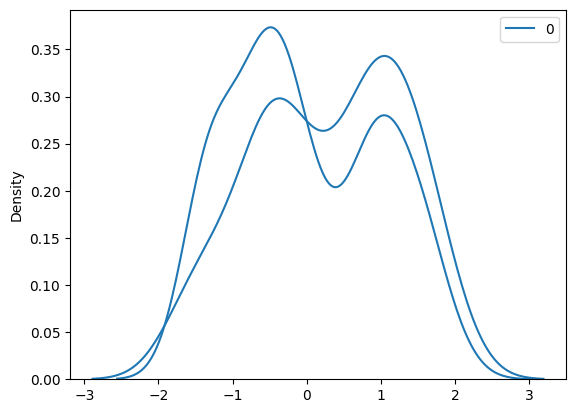

In [18]:
scaler_test = StandardScaler()

time_train_scaled = scaler_test.fit_transform(X_train[['time']])

time_test_scaled = scaler_test.transform(X_test[['time']])

ax = sns.kdeplot(time_train_scaled)

ax = sns.kdeplot(time_test_scaled)

plt.show()

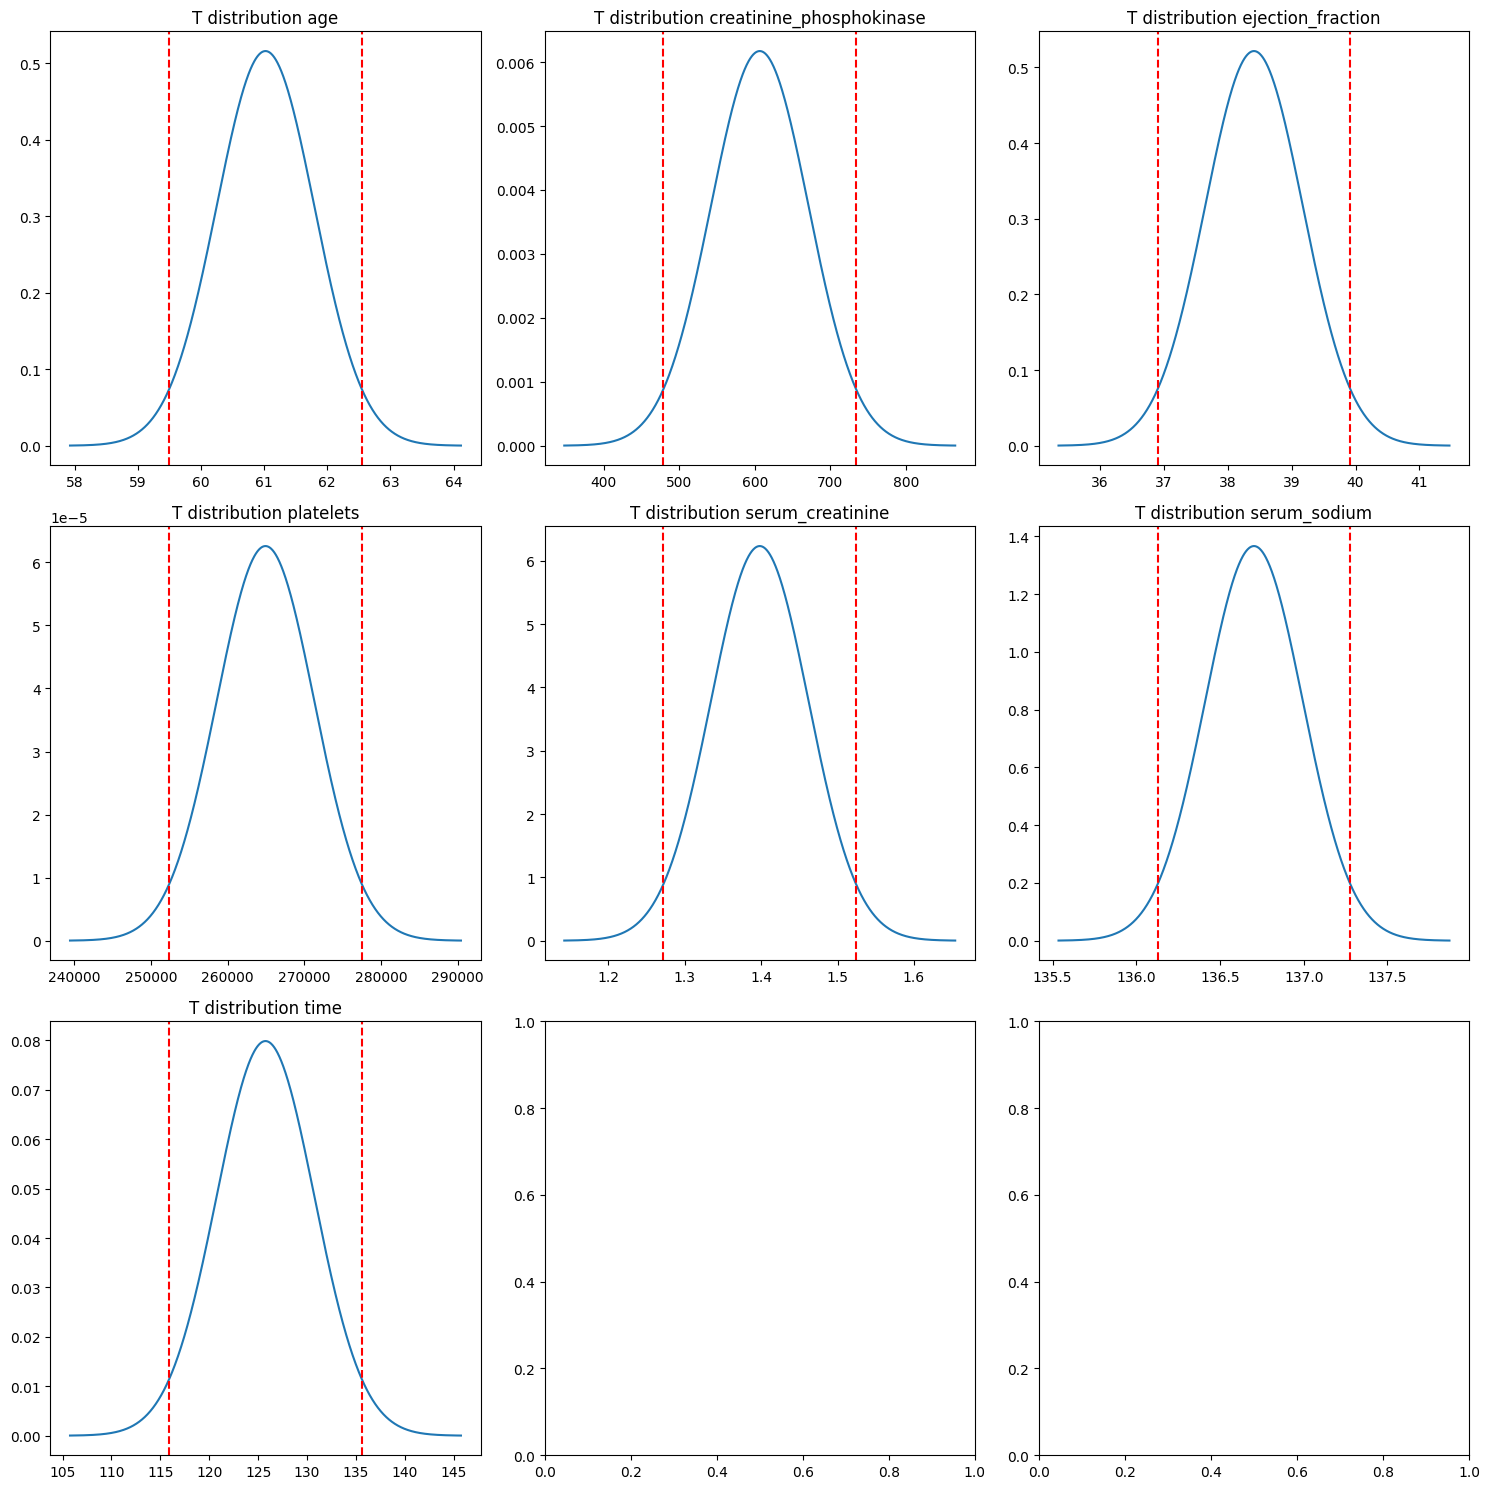

In [19]:
#Visualize the sample mean distribution with t-distribution

fig, ax = plt.subplots(3,3, figsize=(15,15))

ax = ax.flatten()

for i, var in enumerate(num_vars):

  mean = np.mean(train_df[var])

  #Standard error = sample's SD/sqrt(n)

  std_error = np.std(train_df[var])/np.sqrt(len(train_df[var]))

  #Generate the range of mean

  range_mean = np.linspace(mean-4*std_error,mean+4*std_error,1000)

  #Compute for probability

  prob = stats.norm.pdf(range_mean, mean, std_error)

  #Plot T-distribution T(X|mean,std_error)

  ax[i].plot(range_mean,prob)

  ax[i].set_title(f'T distribution {var}')

  #Plot the CI

  ax[i].axvline(x=descriptive.loc[var,'lower_95'], color='r', linestyle='--')

  ax[i].axvline(x=descriptive.loc[var,'upper_95'], color='r', linestyle='--')



plt.tight_layout()

plt.show()

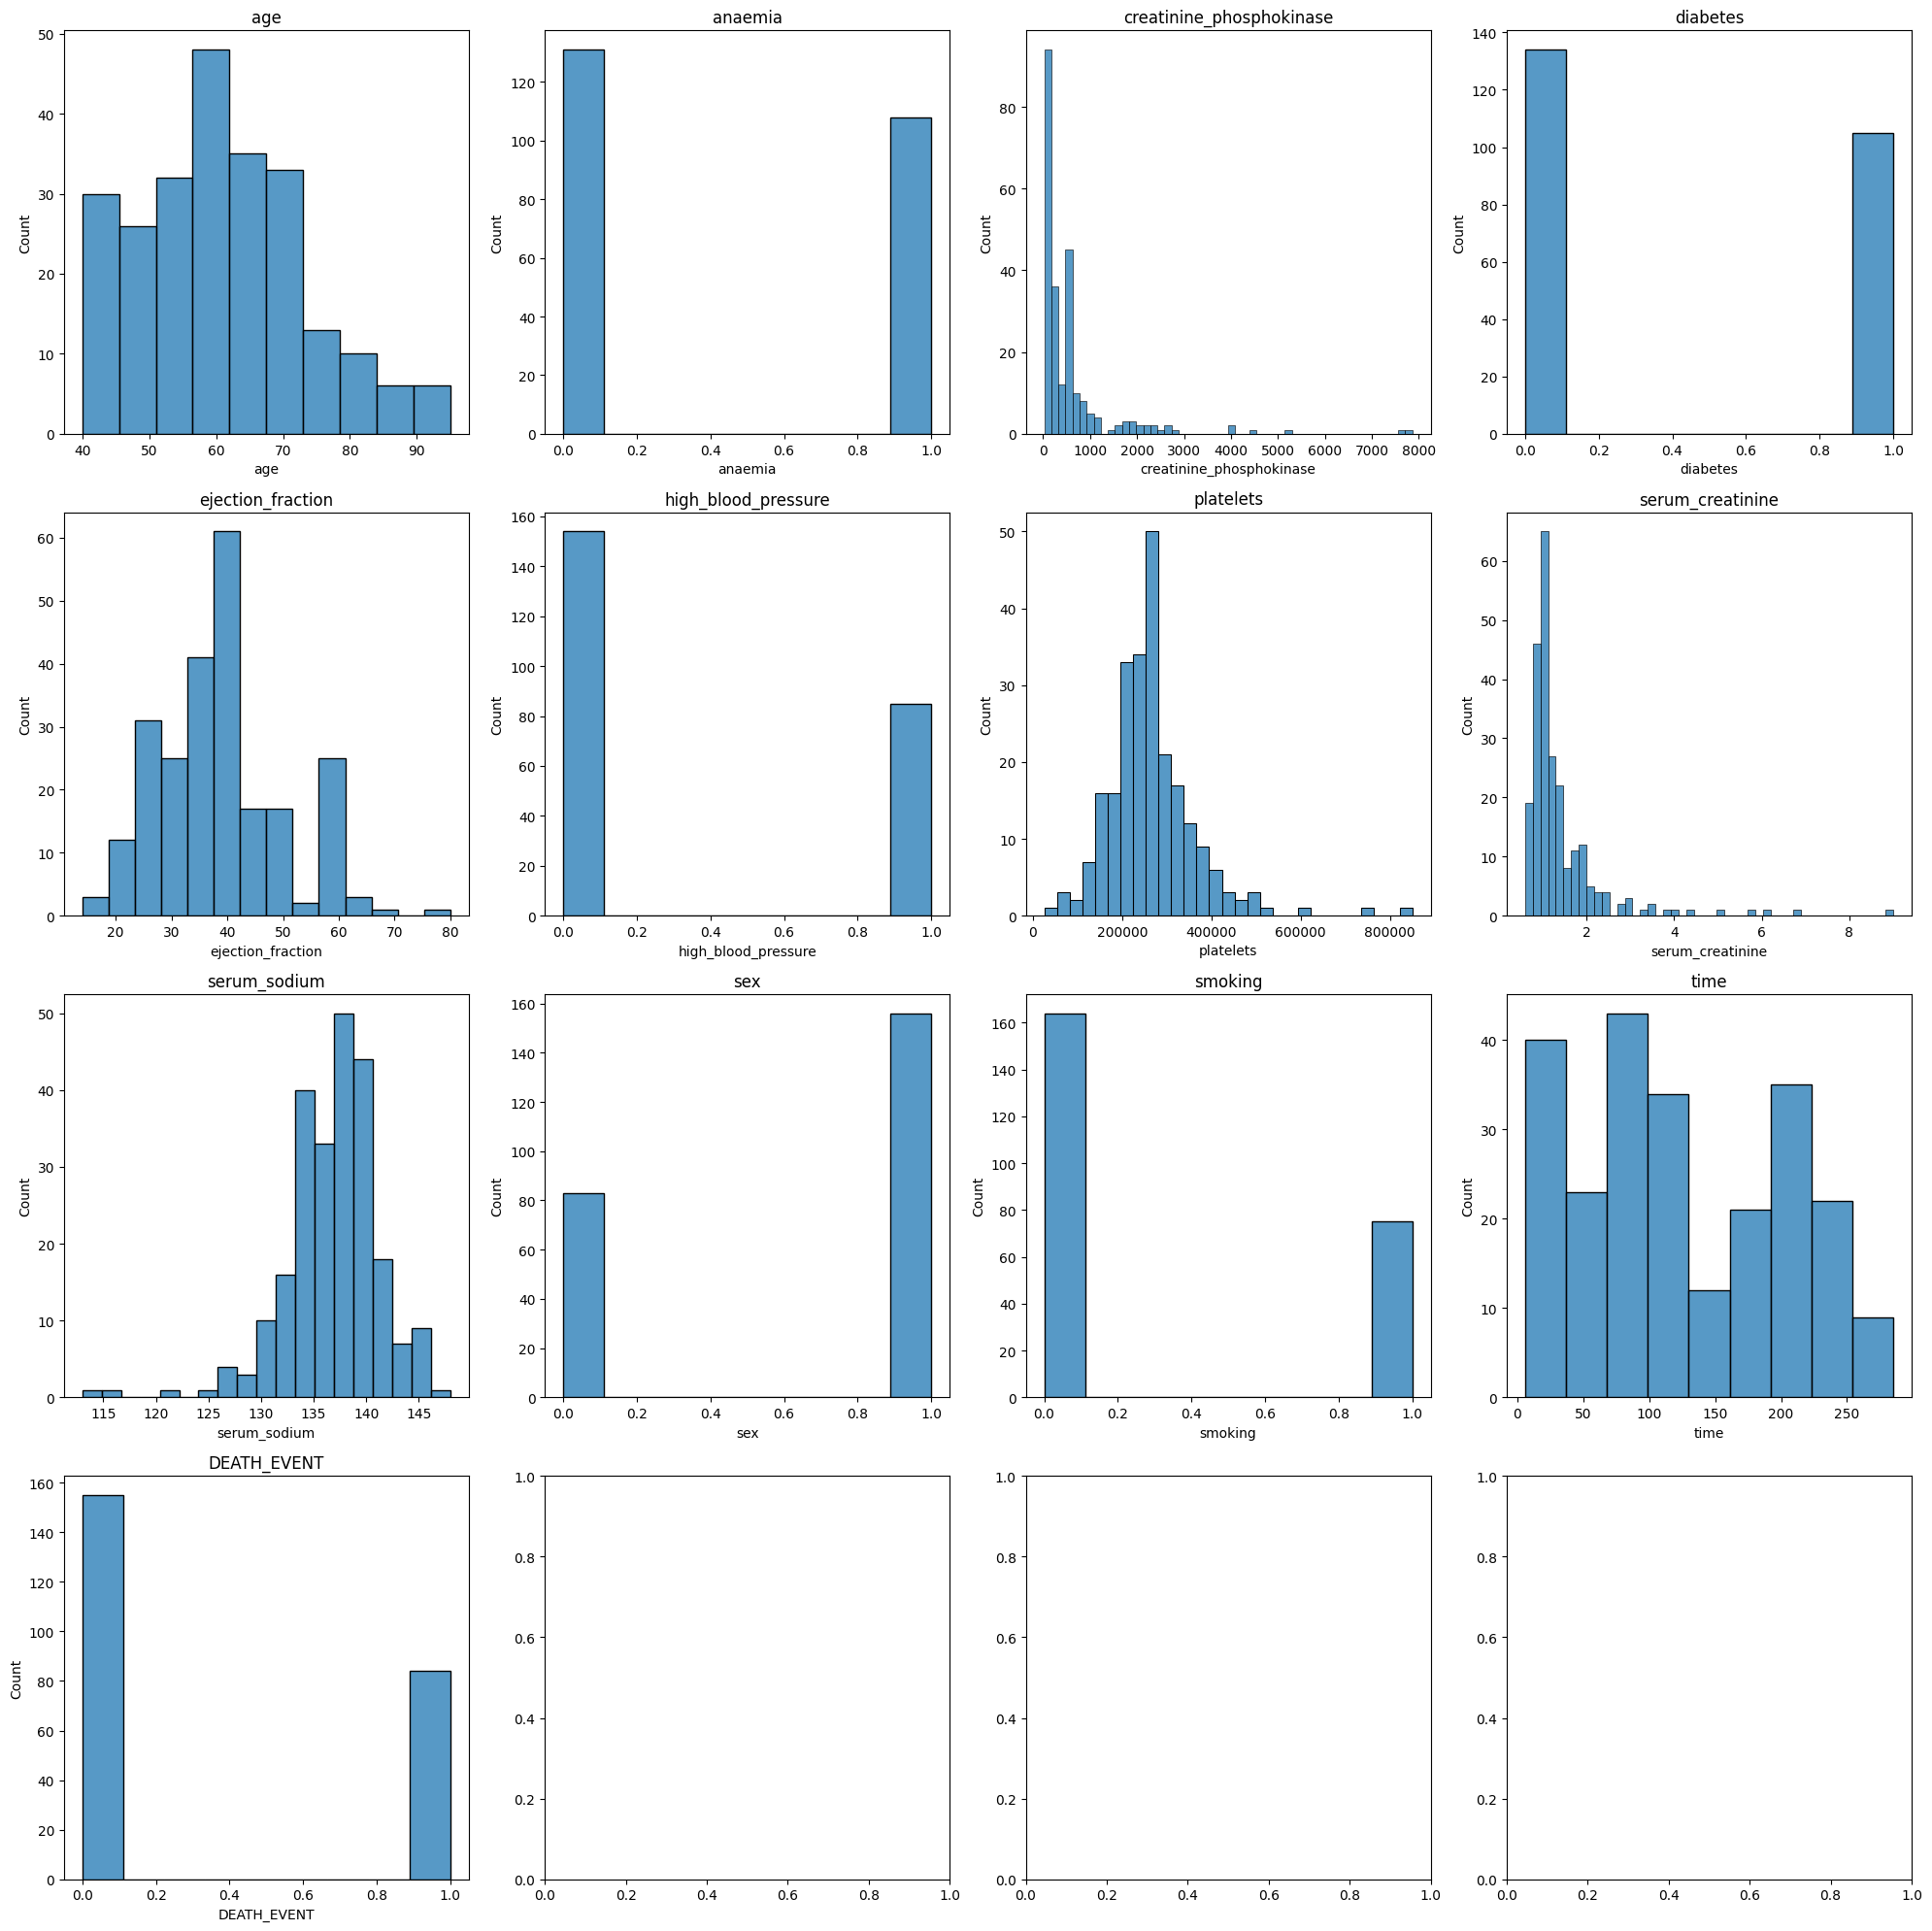

In [20]:
fig, ax = plt.subplots(4,4, figsize=(20,20))

ax = ax.flatten()

for i,var in enumerate(train_df.columns):

  sns.histplot(data=train_df, x=var, ax=ax[i])

  ax[i].set_title(var)

plt.tight_layout()

plt.show()

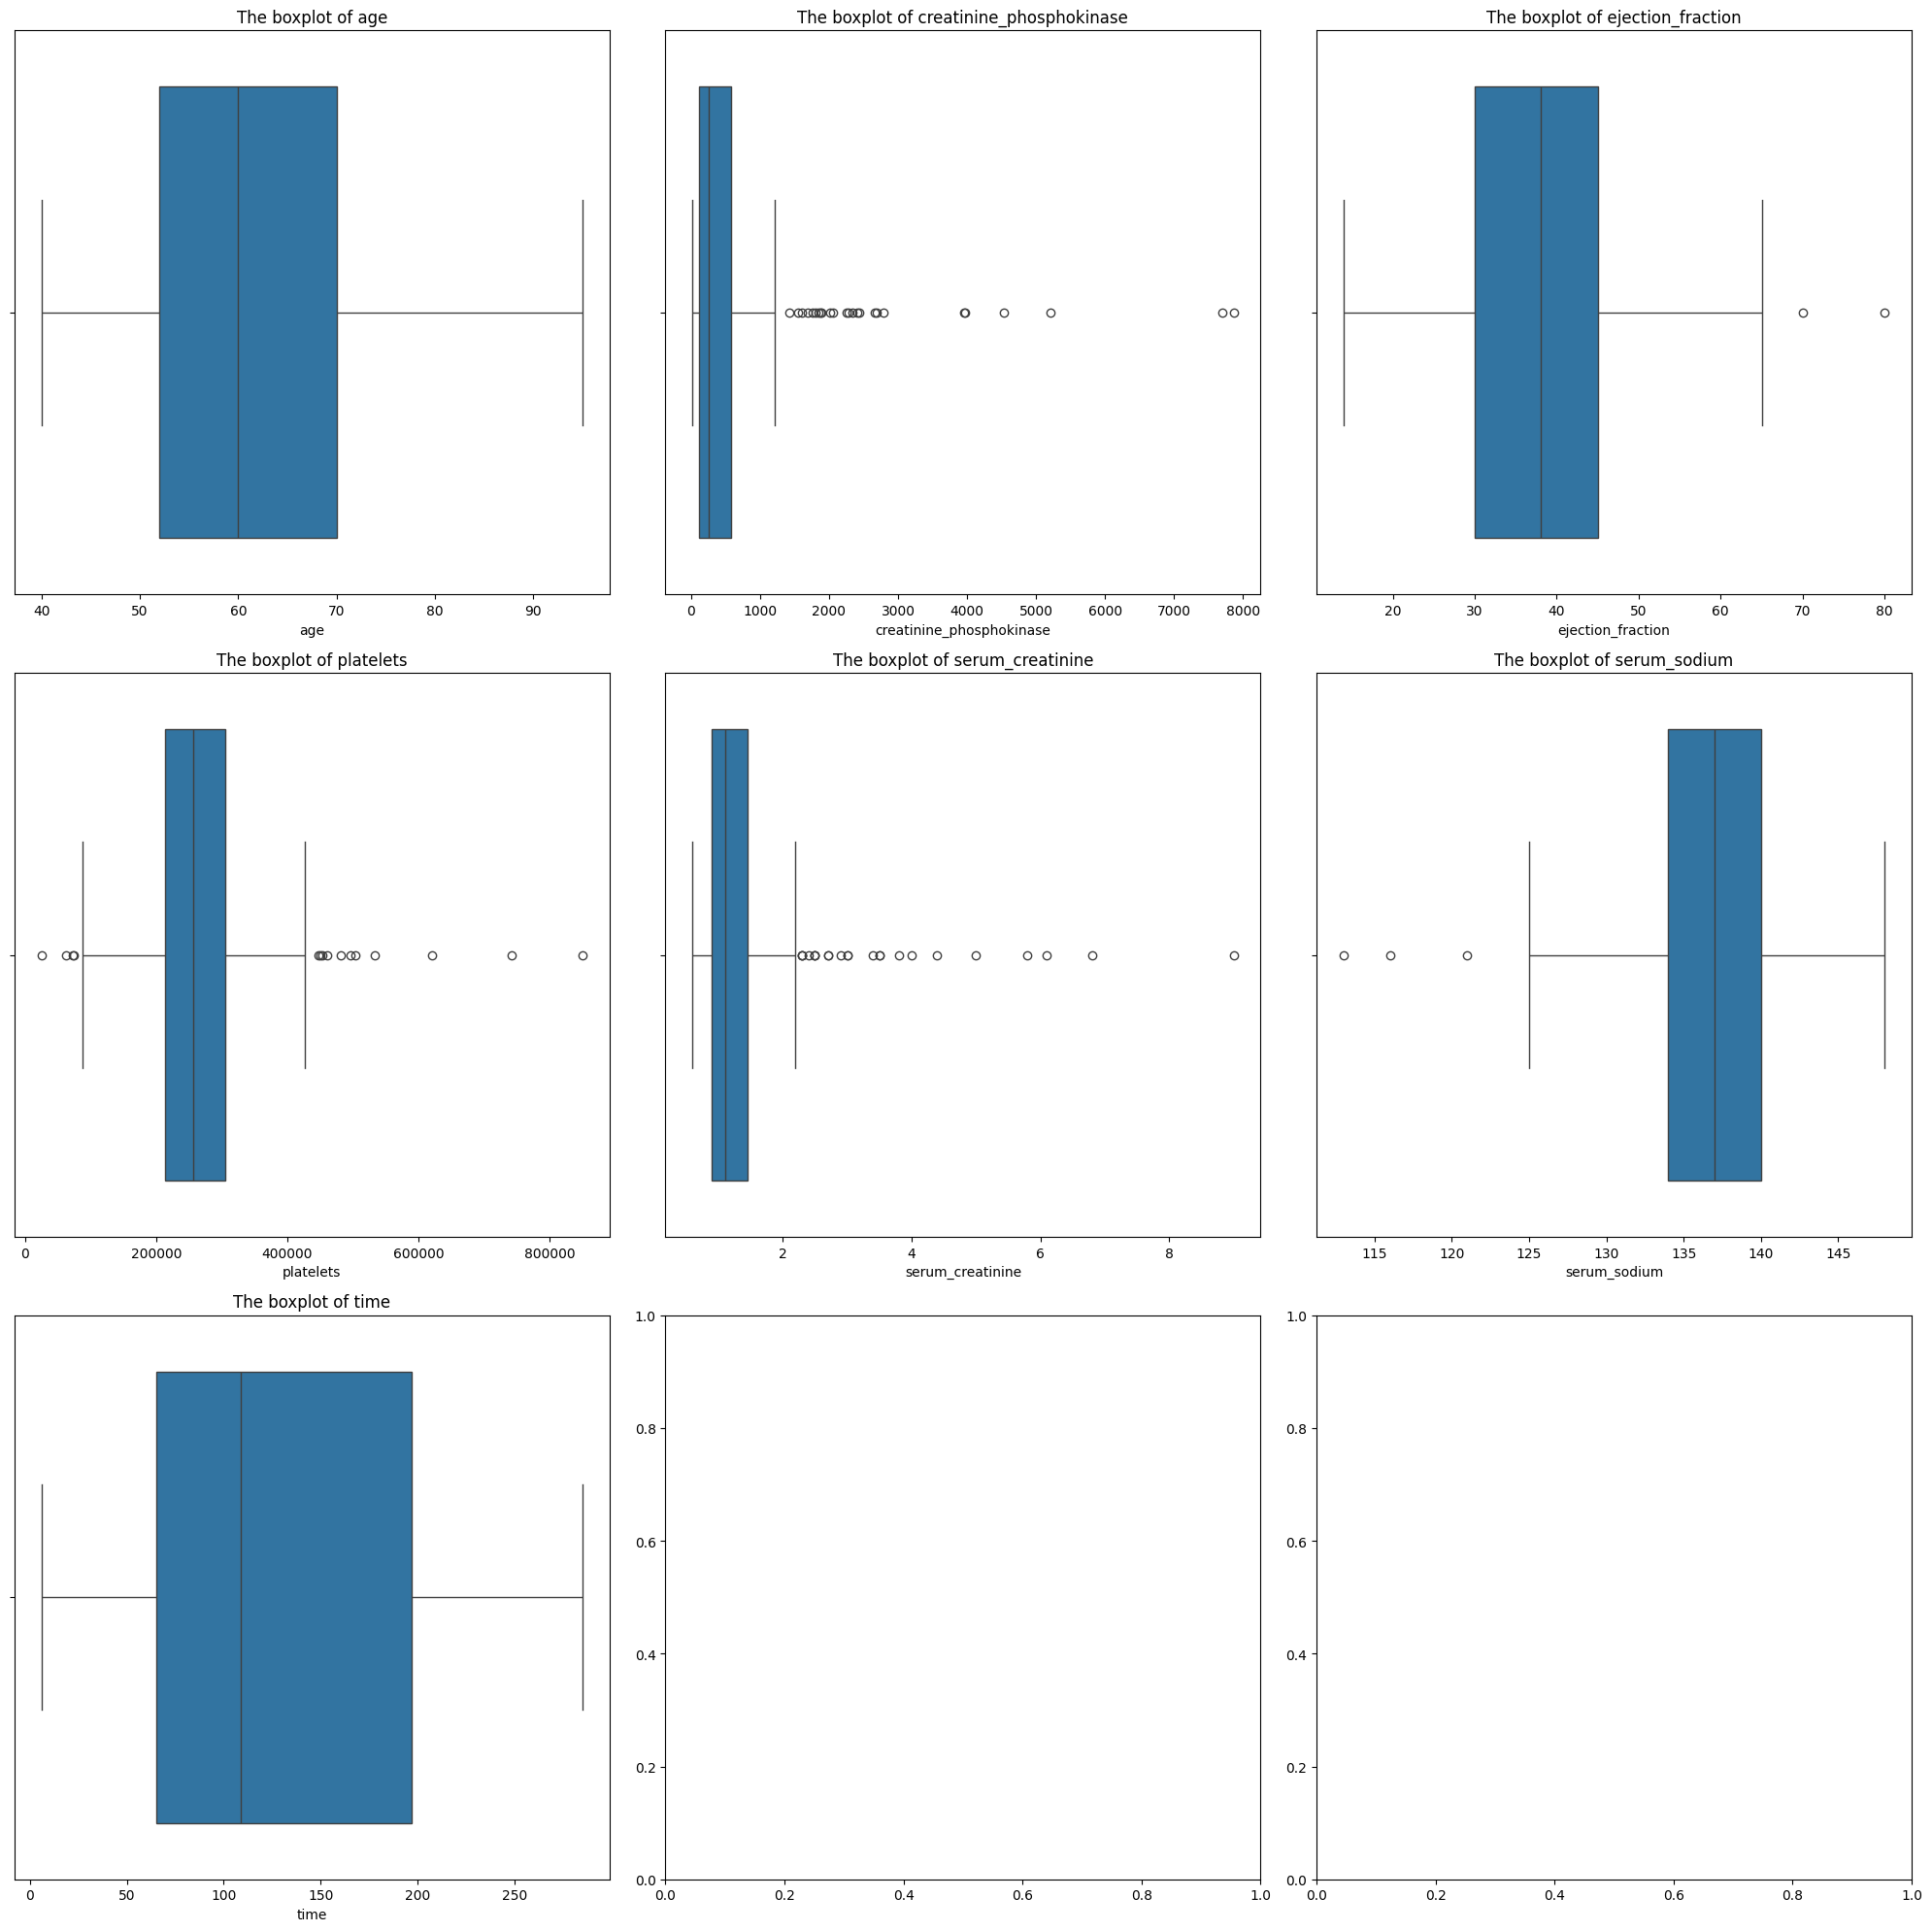

In [21]:
fig, ax = plt.subplots(3,3, figsize=(20,20))

ax = ax.flatten()

for i, var in enumerate(num_vars):

  sns.boxplot(data=train_df, x=var, ax=ax[i])

  ax[i].set_title(f'The boxplot of {var}')



plt.tight_layout()

plt.show()

Multivariate analysis

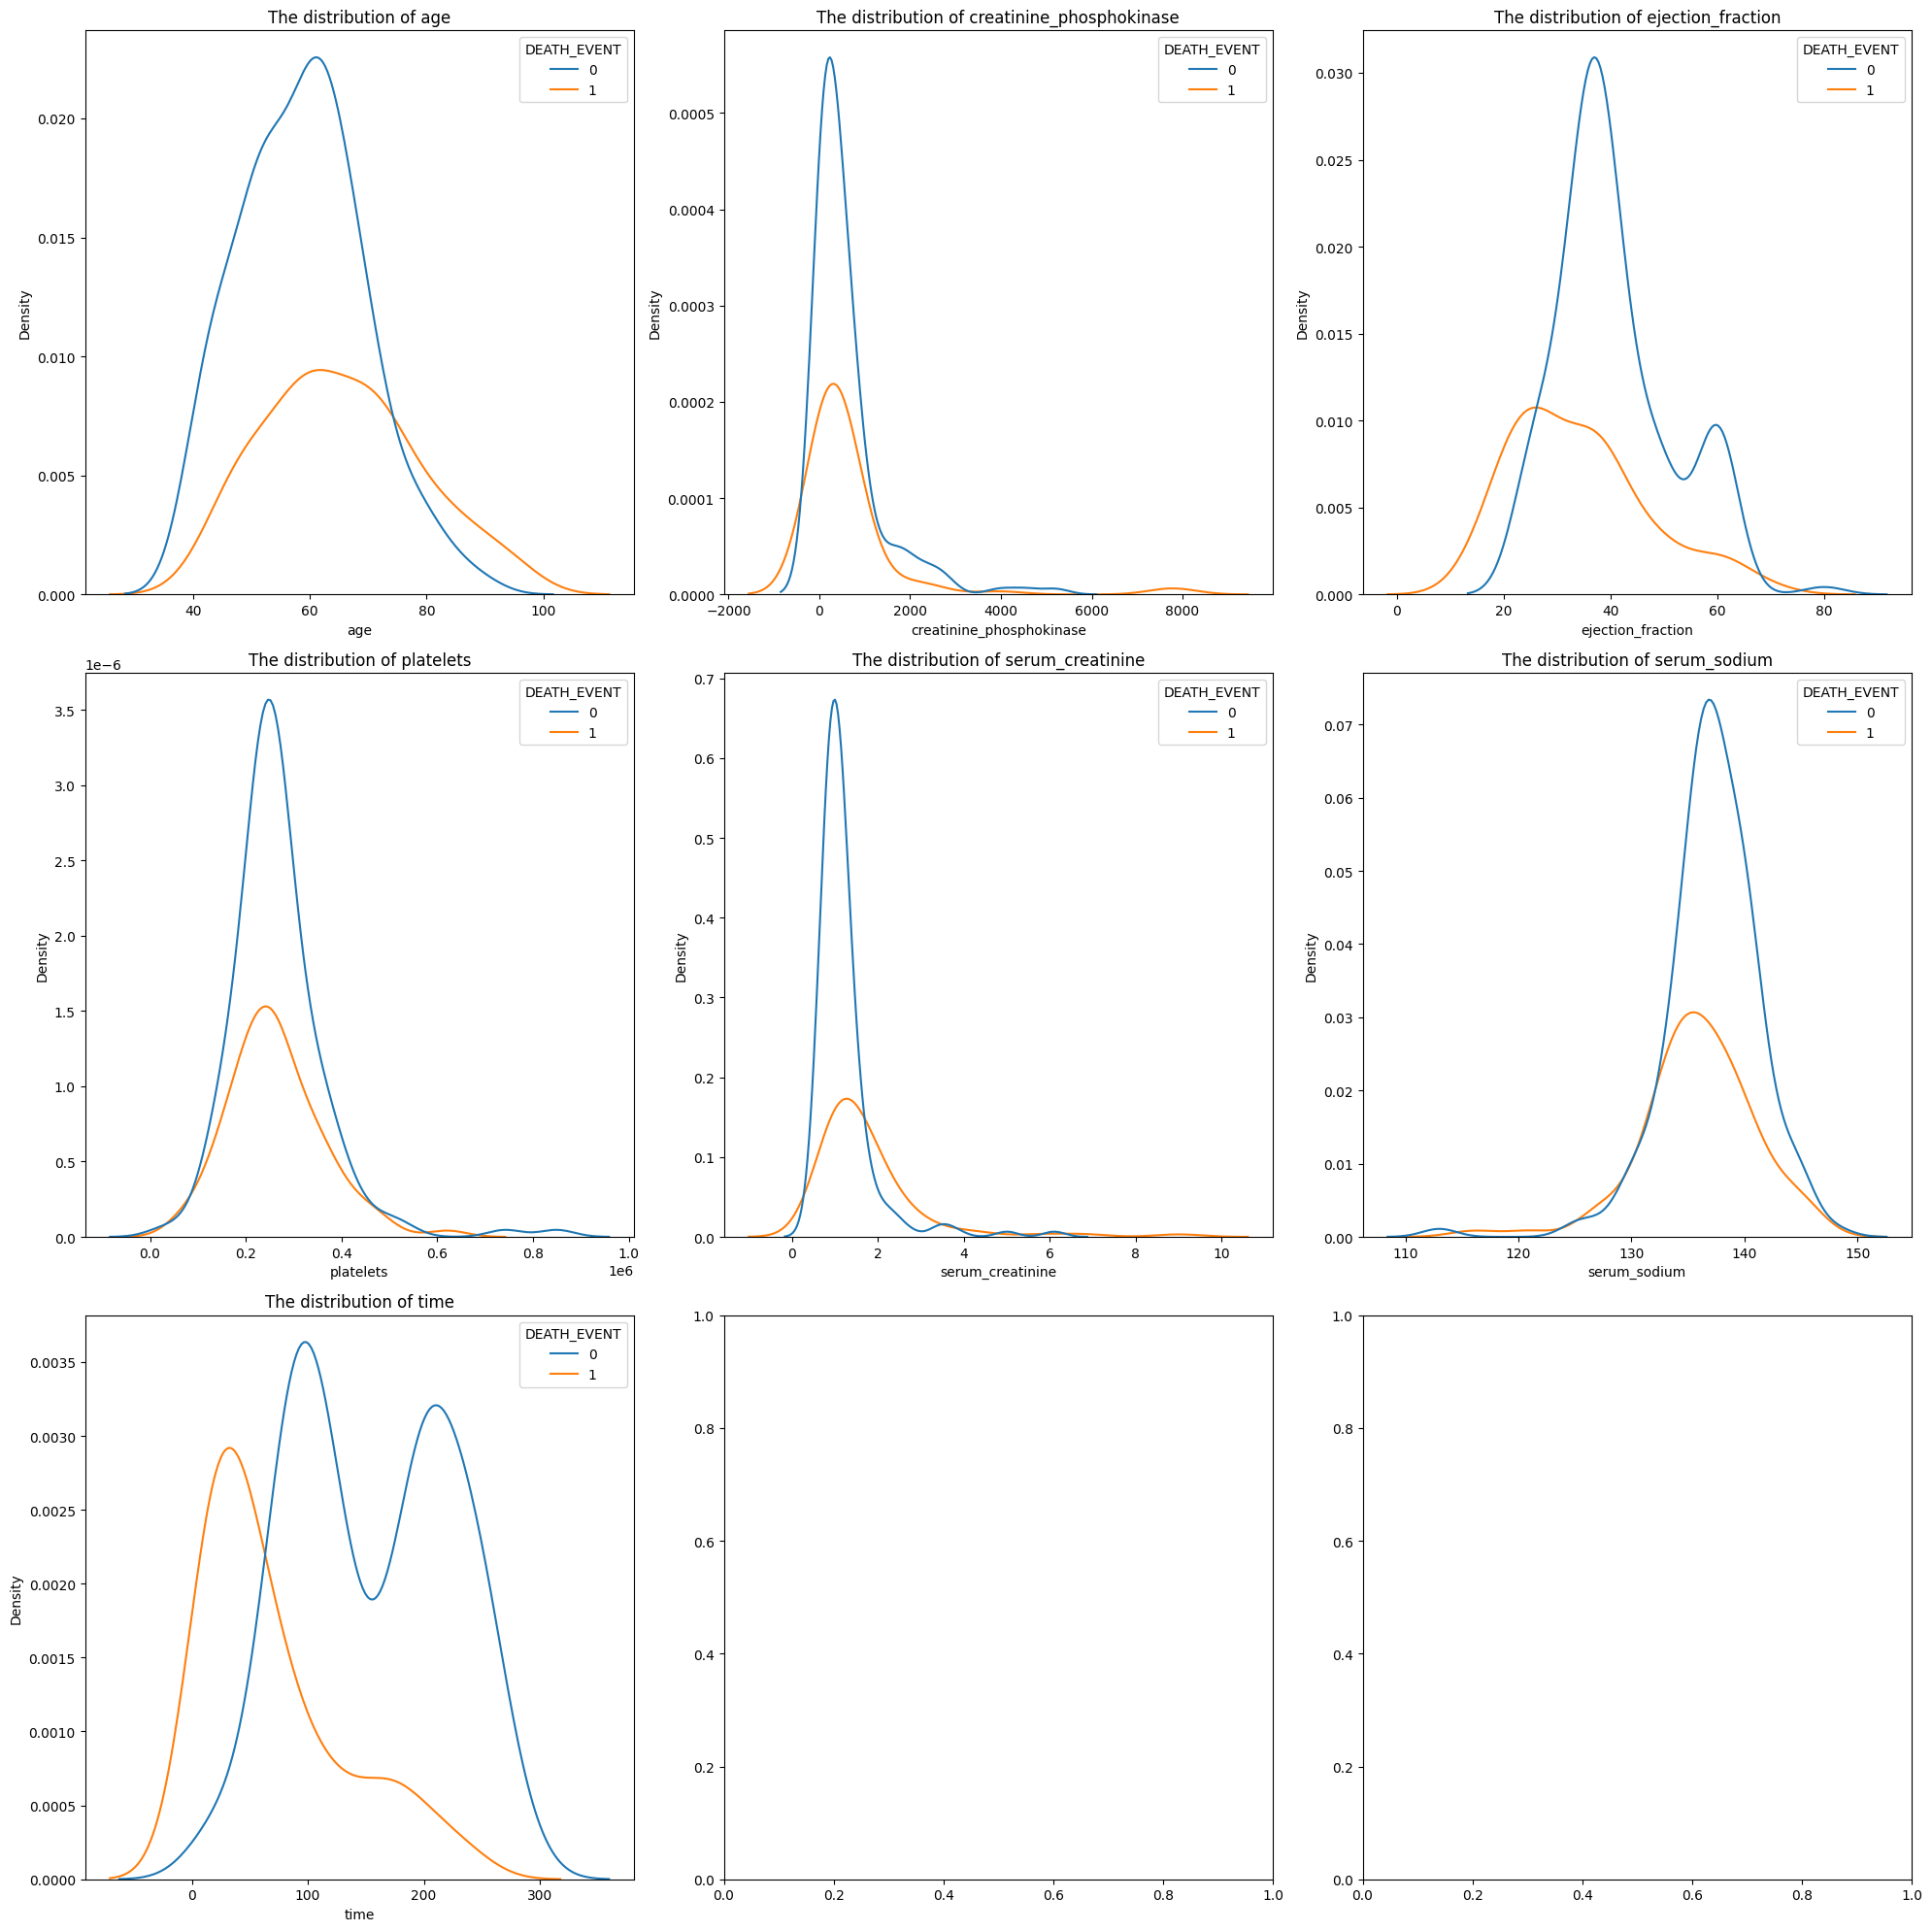

In [22]:
fig, ax = plt.subplots(3,3,figsize=(20,20))

ax = ax.flatten()

for i, var in enumerate(num_vars):

  sns.kdeplot(data=train_df, x=var, hue='DEATH_EVENT', ax=ax[i])

  ax[i].set_title(f'The distribution of {var}')

plt.tight_layout()

plt.show()

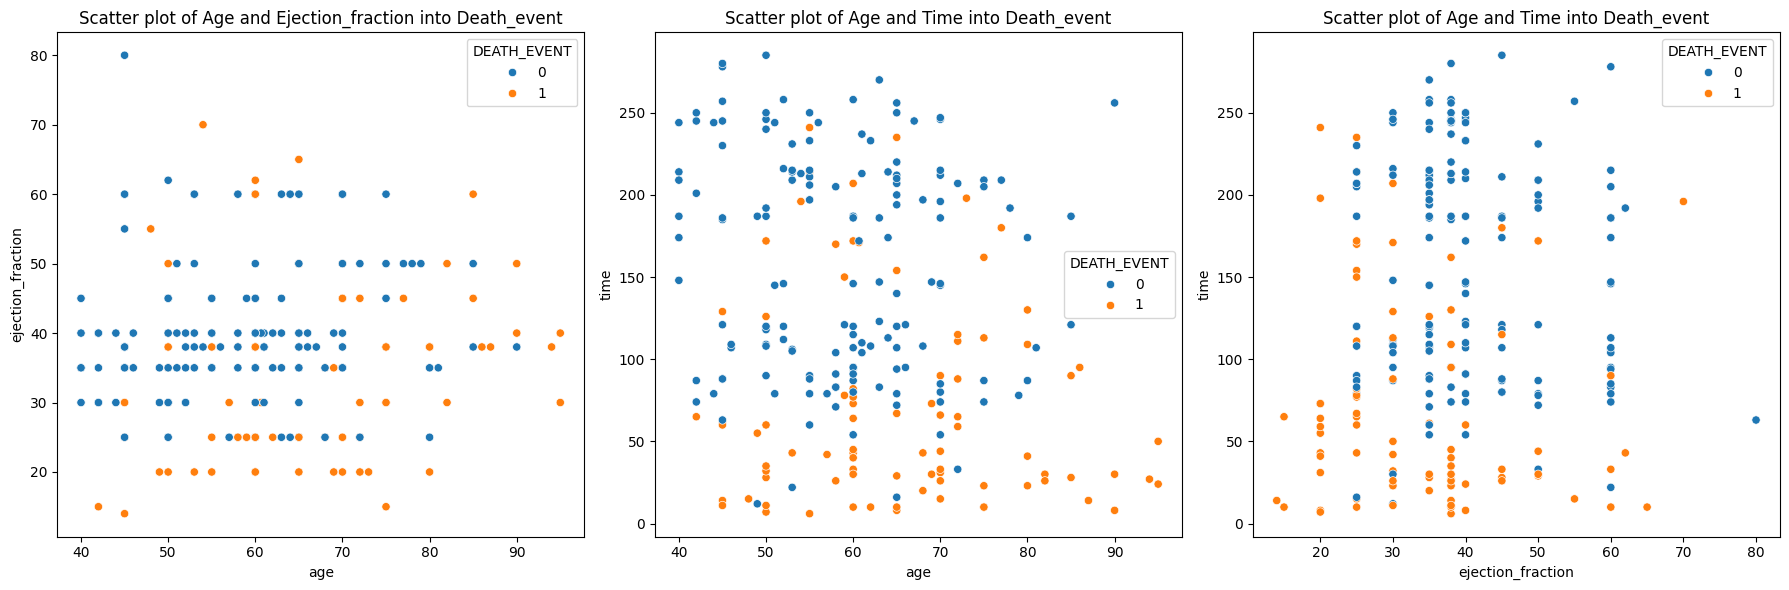

In [23]:
# inspect Age and Ejection into Death_event

fig, ax = plt.subplots(1,3, figsize=(18,6))

ax = ax.flatten()

#Inpsect age, ejection_fraction into death_event

sns.scatterplot(data=train_df, x='age', y='ejection_fraction', hue='DEATH_EVENT',ax=ax[0])

ax[0].set_title('Scatter plot of Age and Ejection_fraction into Death_event')

#Inspect age, time into Death_event

sns.scatterplot(data=train_df, x='age', y='time', hue='DEATH_EVENT', ax=ax[1])

ax[1].set_title('Scatter plot of Age and Time into Death_event')

#Inspect ejection_fraction and time into death_event

sns.scatterplot(data=train_df, x='ejection_fraction', y='time', hue='DEATH_EVENT', ax=ax[2])

ax[2].set_title('Scatter plot of Age and Time into Death_event')

plt.tight_layout()

plt.show()

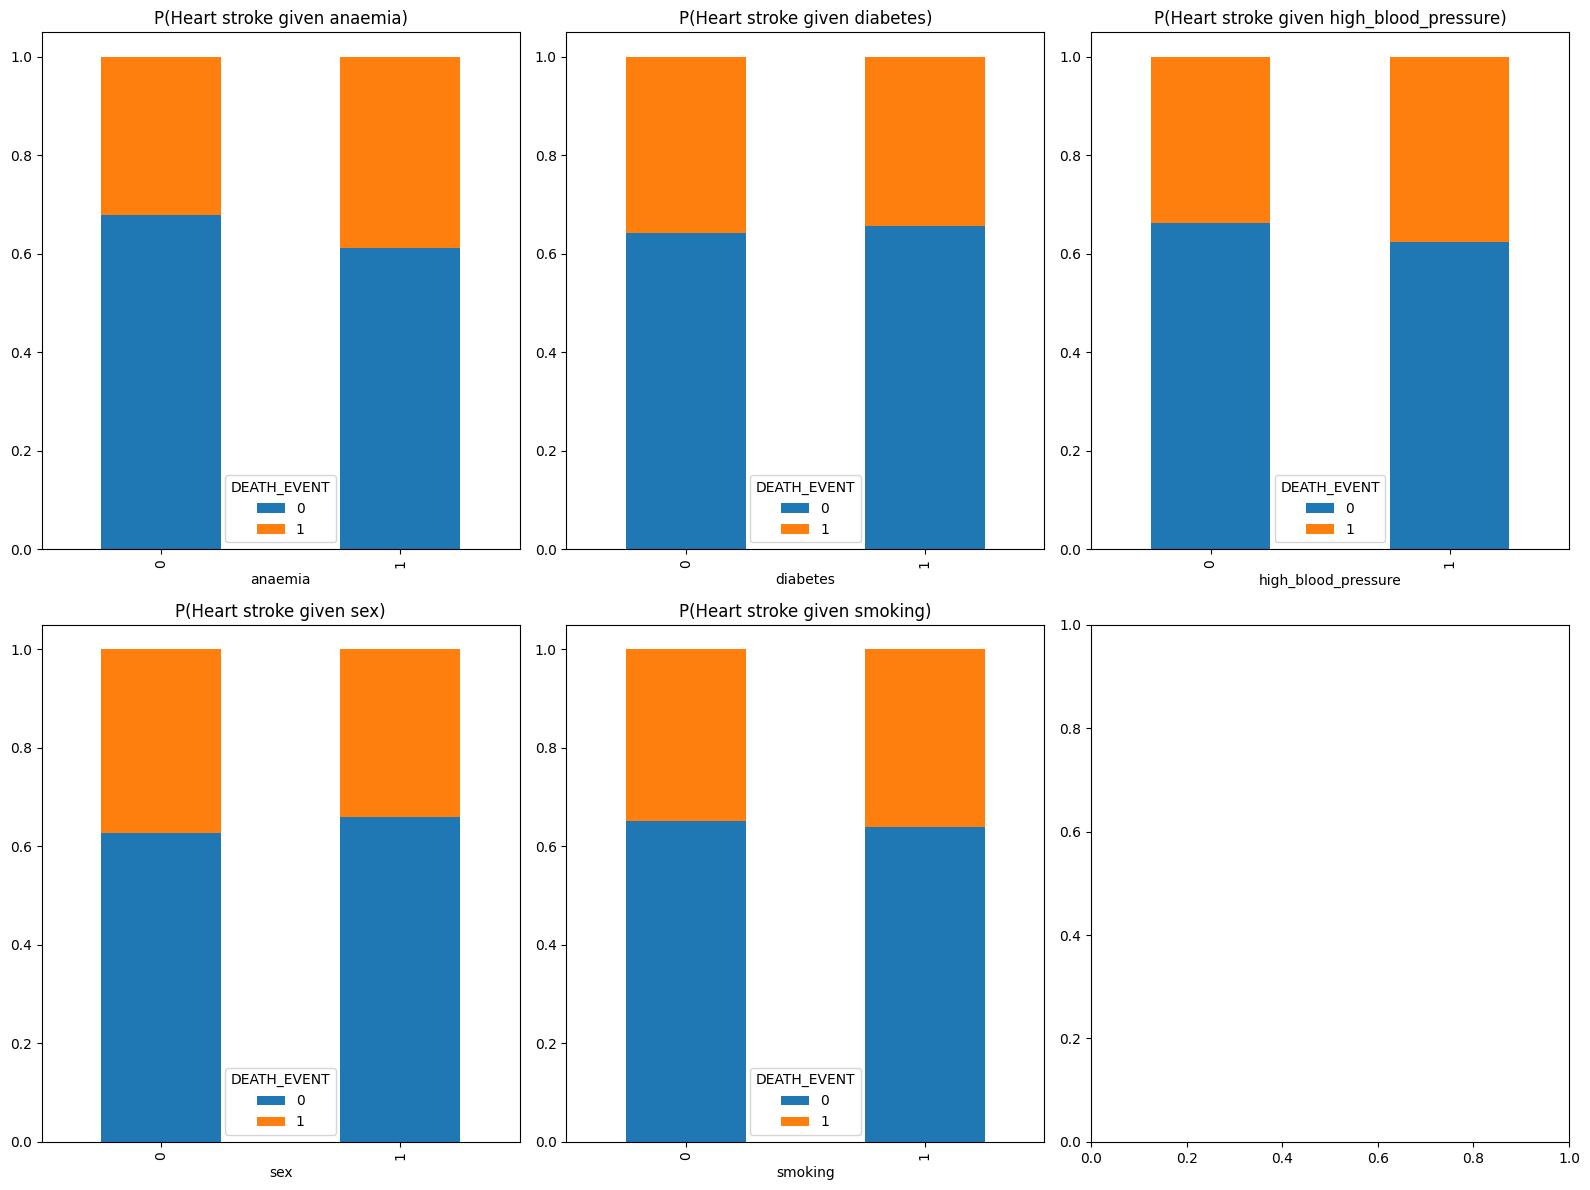

In [24]:
#Categorical versus death_event analysis

fig, ax = plt.subplots(2,3, figsize=(16,12))

ax = ax.flatten()

cat_vars = train_df.columns.difference(num_vars).difference(['DEATH_EVENT'])

for i, var in enumerate(cat_vars):

  pd.crosstab(train_df[var], train_df['DEATH_EVENT'], normalize='index').plot(kind='bar', stacked=True, ax=ax[i])

  ax[i].set_title(f'P(Heart stroke given {var})')

plt.tight_layout()

plt.show()

Correlation inspection
Mutual information

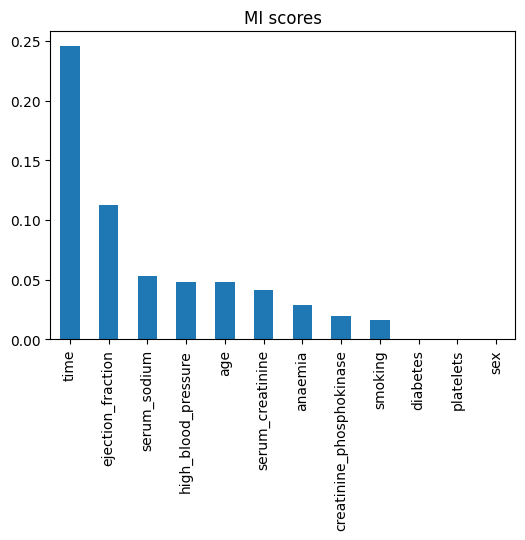

In [25]:
#Perform Mutual information to check data dependence

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto')

mi_scores = pd.Series(mi_scores, name='MI Scores', index=X_train.columns)

mi_scores = mi_scores.sort_values(ascending=False)

mi_scores.plot(kind='bar', figsize=(6,4))

plt.title('MI scores')

plt.show()

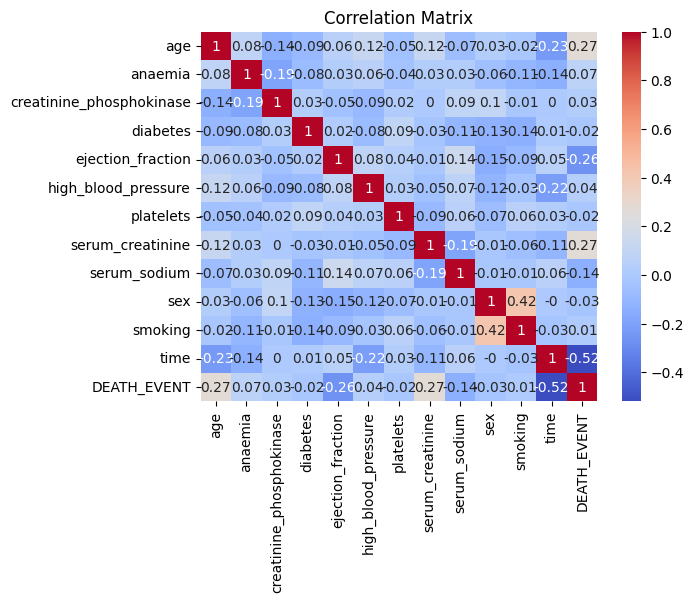

In [26]:
train_df.corr()

sns.heatmap(round(train_df.corr(),2), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

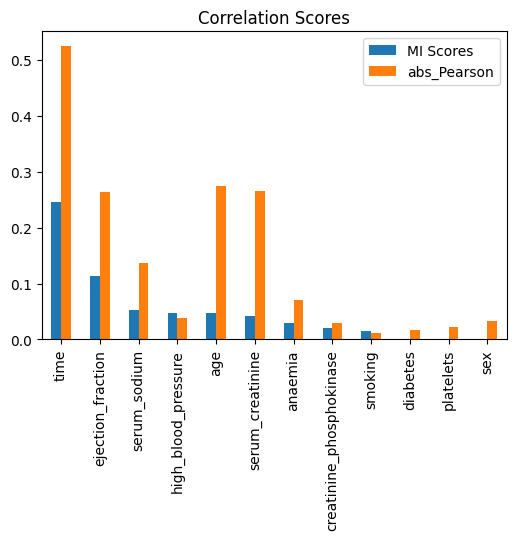

In [27]:
#Add Pearson's correlations into MI score

corr_scores = pd.DataFrame(mi_scores)

#Initial Pearson score versus Death_event

p_score = train_df.corr()['DEATH_EVENT']

# Add into corr_scores

for var in p_score.index.difference(['DEATH_EVENT']):

  corr_scores.loc[var, 'Pearson'] = p_score.loc[var]

  corr_scores.loc[var, 'abs_Pearson'] = np.abs(p_score.loc[var])

corr_scores[['MI Scores','abs_Pearson']].plot(kind='bar', figsize=(6,4))

plt.title('Correlation Scores')

plt.show()


In [28]:
reduced_variables = ['time','ejection_fraction','age','serum_creatinine','creatinine_phosphokinase','sex','smoking','serum_sodium','high_blood_pressure']

PCA to excluded outliners

In [29]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [30]:
# Reduce dimensions

pca_ready = train_df[reduced_variables]

# Scaled data

scaler = StandardScaler()

pca_ready = scaler.fit_transform(pca_ready)

In [31]:
# Initial PCA

pca = PCA()

train_pca_fitted = pca.fit_transform(pca_ready)

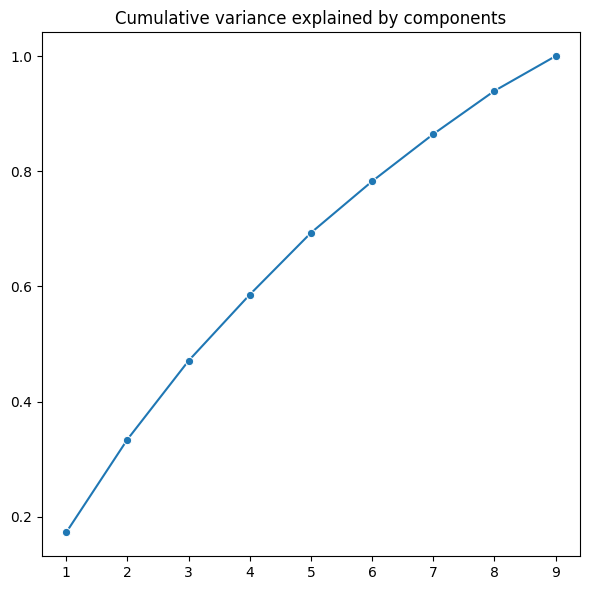

In [32]:
cum_variance = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(6,6))

sns.lineplot(x= range(1,len(cum_variance)+1), y=cum_variance, ax=ax, marker='o')

plt.title(f'Cumulative variance explained by components')

plt.tight_layout()

plt.show()

In [33]:
#Refit with n_components = 6 to capture 80% variance of original training data

pca = PCA(n_components=6)

train_pca_fitted = pca.fit_transform(pca_ready)

test_pca_fitted = pca.transform(scaler.transform(X_test[reduced_variables]))

In [34]:
train_pca_fitted = pd.DataFrame(train_pca_fitted, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

train_pca_fitted['DEATH_EVENT'] = train_df['DEATH_EVENT']

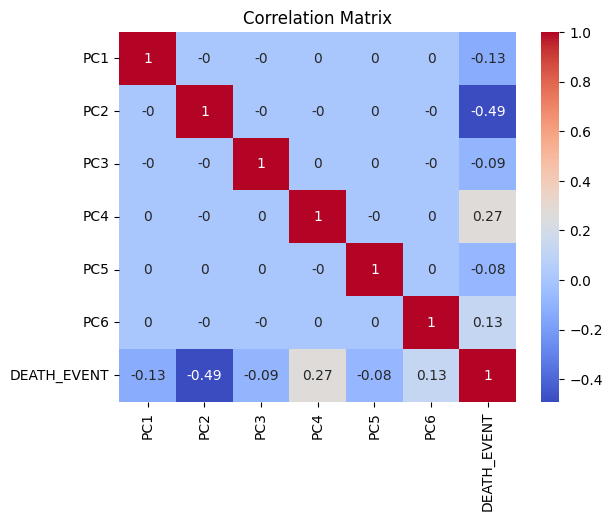

In [35]:
train_pca_fitted.corr()

sns.heatmap(round(train_pca_fitted.corr(),2), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()


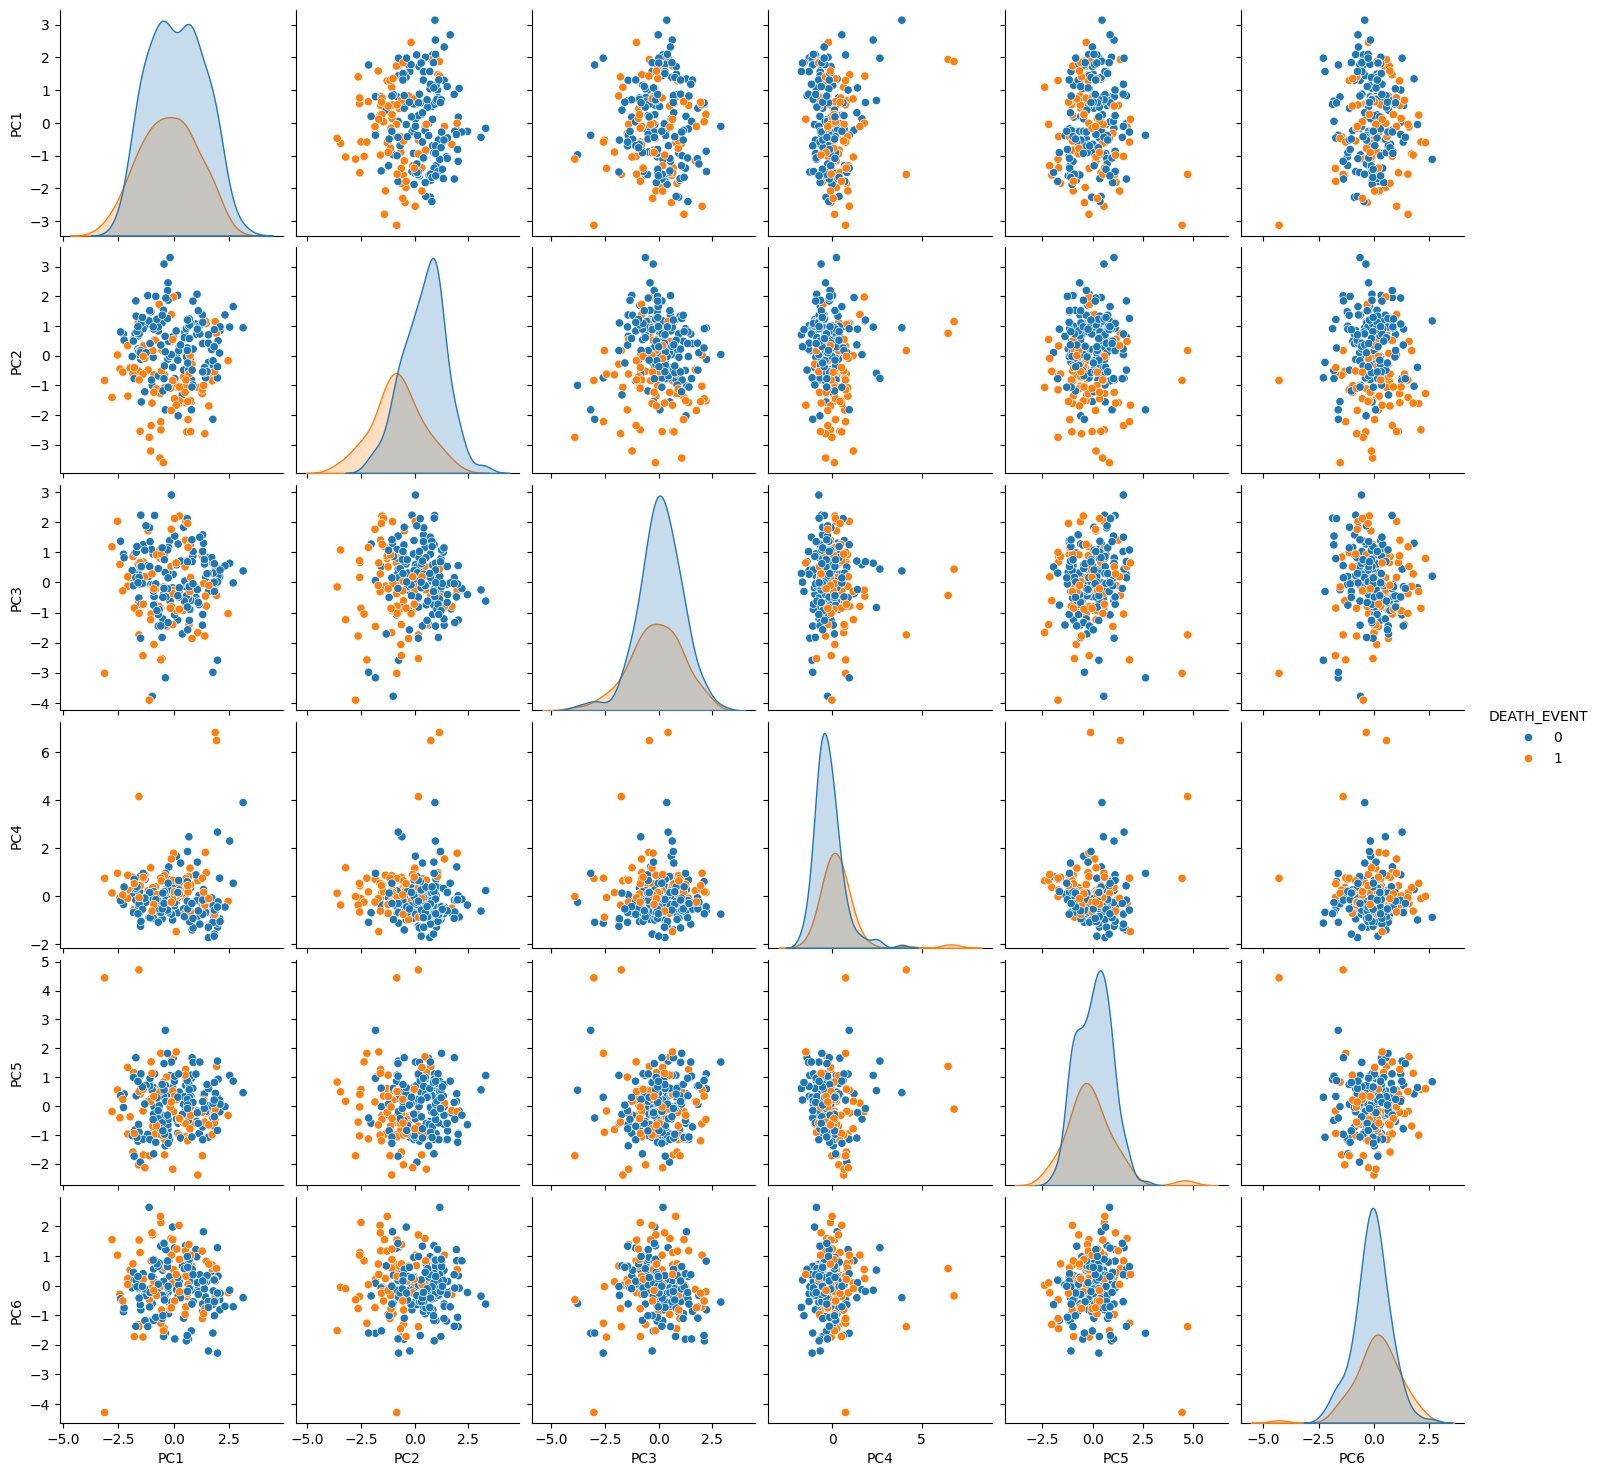

In [36]:
sns.pairplot(data=train_pca_fitted, hue='DEATH_EVENT')


Model training
Preprocessing

In [37]:
#Scale dataset

premodel_scaler = StandardScaler()

X_train_scaled = premodel_scaler.fit_transform(X_train[reduced_variables])

X_test_scaled = premodel_scaler.transform(X_test[reduced_variables])

In [38]:
X_train_scaled.shape, X_test_scaled.shape


((239, 9), (60, 9))

Modeling

In [39]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
#Declare models selection

Models = {

    'Logistic Regression': LogisticRegression(),

    'Decision Tree': DecisionTreeClassifier(),

    'Random Forest': RandomForestClassifier(),

    'KNN': KNeighborsClassifier(),

    'XGBoost': XGBClassifier()

}

In [41]:
#Fit the model and generate result

results = {}

for model_name, model in Models.items():

  model.fit(X_train_scaled, y_train)

  y_pred = model.predict(X_test_scaled)

  results[model_name] = recall_score(y_test, y_pred, pos_label=1)

results

{'Logistic Regression': 0.8333333333333334,
 'Decision Tree': 0.5,
 'Random Forest': 0.6666666666666666,
 'KNN': 0.6666666666666666,
 'XGBoost': 0.6666666666666666}

Inspect predictions

In [42]:
best_model = LogisticRegression(penalty='l2',C=.05)

best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

In [43]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

print(f'Precision: {precision_score(y_test, y_pred, pos_label=1)}')

print(f'Recall: {recall_score(y_test, y_pred, pos_label=1)}')

print(f'F1 score: {f1_score(y_test, y_pred, pos_label=1)}')

Accuracy: 0.9
Precision: 0.7142857142857143
Recall: 0.8333333333333334
F1 score: 0.7692307692307693


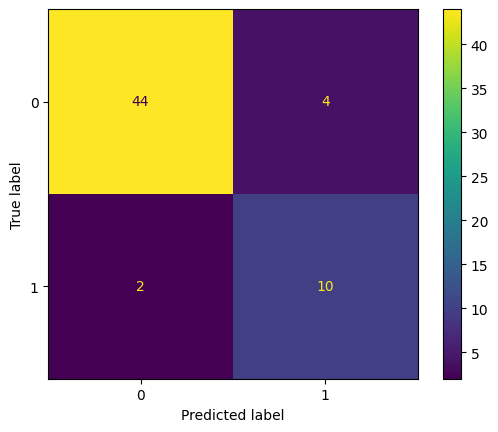

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

disp.plot()

plt.show()

In [45]:
#Plot AUC

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

In [46]:
roc_auc


0.875

Inspect feature important

In [47]:
cof = best_model.coef_[0]

feature_names = X_train[reduced_variables].columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': cof})

feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

In [48]:
feature_importance


,Feature,Coefficient
2,age,0.361050
3,serum_creatinine,0.342741
4,creatinine_phosphokinase,0.080409
6,smoking,0.025432
8,high_blood_pressure,-0.052250
7,serum_sodium,-0.110130
5,sex,-0.139373
1,ejection_fraction,-0.443546
0,time,-0.841093


In [49]:
import joblib


In [50]:
# Save the trained Logistic Regression model
joblib.dump(best_model, 'best_model.pkl')

# Save the scaler
joblib.dump(premodel_scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [51]:
# Load the saved Logistic Regression model
model = joblib.load('best_model.pkl')

# Load the saved scaler
scaler = joblib.load('scaler.pkl')

print("Model and scaler loaded successfully.")


Model and scaler loaded successfully.
